In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(1950,2050)]
i =0
result = np.zeros((100,700))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1950-2050/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.'+yy+'-'+mm +'-01.HMXL.nc')
        plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[280:344,700:1400]
        #latt = latt[280:344,700:1400]
        #plotvar = plotvar[280:344,700:1400]
        lont = lont[200:319,700:1400]
        latt = latt[200:319,700:1400]
        plotvar = plotvar[200:319,700:1400]
        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
A = np.arange(100)
B = np.arange(700)
xx, yy = np.meshgrid(B, A)

In [5]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,190,200,210,220,230,245]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,800,1000,1200,1500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


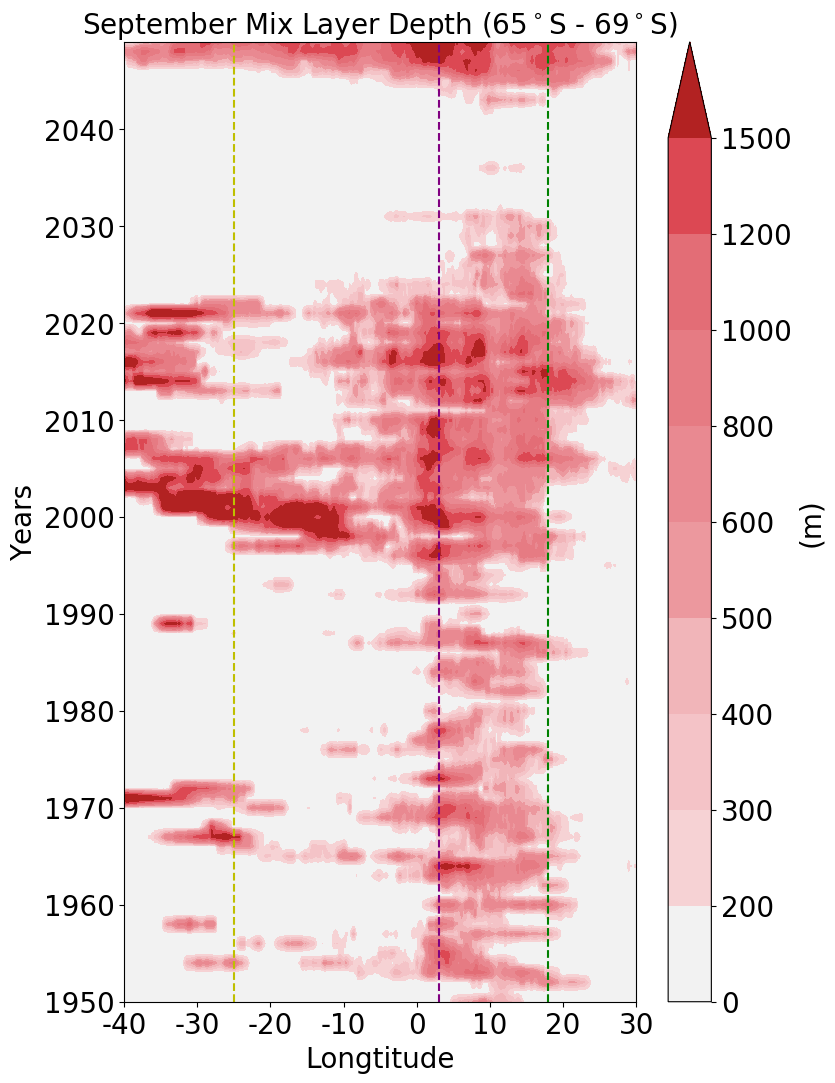

In [6]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax0,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
ax0.set_title('Mixed Layer Depth')
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
###plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.vlines(430, 0, 159, colors = "b",linestyles = "dashed")
plt.vlines(430, 0, 99, colors = "purple",linestyles = "dashed")
plt.vlines(580, 0, 99, colors = "g",linestyles = "dashed")
plt.vlines(150, 0, 99, colors = "y",linestyles = "dashed")
#plt.vlines(130, 0, 309, colors = "k",linestyles = "dashed")
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,701,100), ['-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
plt.yticks(range(0,99,10), ['1950', '1960','1970', '1980','1990','2000', '2010','2020', '2030','2040','2050'],**my_font)
#plt.yticks(range(0,1241,40), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
#                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('September Mix Layer Depth (65$^\circ$S - 69$^\circ$S)',**my_font)

plt.savefig("2mxld1950.png",bbox_inches='tight',dpi=fig.dpi)

In [7]:
latt[:,0]

masked_array(data=[-70.02049853, -69.97823672, -69.9359749 , -69.89371309,
                   -69.85145127, -69.80918946, -69.76692765, -69.72466583,
                   -69.68240402, -69.6401422 , -69.59788039, -69.55561858,
                   -69.51335676, -69.47109495, -69.42883313, -69.38657132,
                   -69.34430951, -69.30204769, -69.25978588, -69.21752406,
                   -69.17526225, -69.13300044, -69.09073862, -69.04847681,
                   -69.00621499, -68.96395318, -68.92169136, -68.87942955,
                   -68.83716774, -68.79490592, -68.75264411, -68.71038229,
                   -68.66812048, -68.62585866, -68.58359685, -68.54133504,
                   -68.49907322, -68.45681141, -68.41454959, -68.37228778,
                   -68.33002596, -68.28776415, -68.24550233, -68.20324052,
                   -68.16097871, -68.11871689, -68.07645508, -68.03419326,
                   -67.99193145, -67.94966963, -67.90740782, -67.865146  ,
                   -67.82